# First Simple Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor

In [2]:
ipe_df = pd.read_csv('data/15_min_data_HFF/IPE 15 min 2022-08-08.csv')

In [3]:
ipe_df['contTime'] = pd.to_datetime(ipe_df['contTime'])
ipe_df.set_index(['contTime'], inplace=True)
ipe_df.index.names = ['date']

In [4]:
ipe_daily = ipe_df.resample('D').mean()

In [5]:
# set cutoff date for late boundary
ipe_daily = ipe_daily[:'2022-08-01']

In [6]:

ipe_daily.drop(['TurbDailyMn', 'TurbSamp_NTU',
       'ChloroDailyMn', 'BGADailyMn', 'ODODailyMn',
       'TempDailyMn', 'CondDailyMn', 'TDS_mgL',
       'TotalPres_psi', 'AshtonAirPres_psi', 'Depth_ft', 'Shift_psi',
       'Turb_FNU_raw', 'Chloro_RFU_raw', 'BGA_RFU_raw', 'ODO_mgL_raw',
       'Temp_C_raw', 'Cond_muSCm_raw', 'TDS_mgL_raw', 'TotalPres_psi_raw',
       'Turb_avdymn', 'Chlor_avdymn', 'Cyano_avdymn', 'Temp_avdymn',
       'ODO_avdymn', 'Cond_avdymn'], axis=1, inplace=True)

In [7]:
ipe_interp = ipe_daily.interpolate(method='spline', order=2)

In [8]:
ipe_interp.isna().sum()

Turb_FNU      0
Chloro_RFU    0
BGA_RFU       0
ODO_mgL       0
Temp_C        0
Cond_muSCm    0
dtype: int64

In [9]:
# import island park dam hydrology data
hydro_df = pd.read_csv('data/IslandPark.TS.csv')

# set the datetime to the index
hydro_df['date'] = pd.to_datetime(hydro_df['date'])
hydro_df.set_index(['date'], inplace=True)
hydro_df.index.names = ['date']
hydro_df.columns

Index(['elevation.ft', 'volume.af', 'smoothed.vol', 'smoothed.elev',
       'surfacearea.acres', 'net.evap.af', 'delta.V.af', 'regQ.cfs',
       'gain.cfs', 'smoothed.natQ.cfs'],
      dtype='object')

In [10]:
# set the range of the data to the same as the sonde data
hydro_df = hydro_df['2014-06-20':'2022-08-01']

In [11]:
# interpolate NaN values
hydro_interp = hydro_df.interpolate(method='spline', order=2)

In [12]:
# calculate exposed shoreline
hydro_interp['exposed_shore'] = 8000 - hydro_interp['surfacearea.acres']

In [13]:
# drop redundant columns
hydro_interp.drop(['volume.af', 'smoothed.vol', 
                   'smoothed.elev', 'surfacearea.acres'], axis=1, inplace=True)

In [14]:
climate_df = pd.read_csv('data/Clean.Climate.TS.csv')
climate_df['Date'] = pd.to_datetime(climate_df['Date'])
climate_df.set_index(['Date'], inplace=True)
climate_df.drop(['GT.TAVE', 'GT.TMIN', 'GT.TMAX', 'GT.DP', 'GT.AP', 'GT.SWE', 'PB.TAVE',
       'PB.TMIN', 'PB.TMAX', 'PB.DP','HFW.AP', 'TR.SWE', 'FR.SWE', 'HF.SWE', 'HFW.SWE', 'AG.DP', 'AG.ET',
       'HFW.Cum.P', 'AG.Cum.P', 'AG.Cum.ET', 'PB.AP', 'PB.SWE', 'BB.TAVE', 'BB.TMIN', 'BB.TMAX', 'BB.DP', 'BB.AP',
       'BB.SWE', 'LL.TAVE', 'LL.TMIN', 'LL.TMAX', 'LL.DP', 'LL.AP', 'LL.SWE', 'GL.TAVE',
       'GL.TMIN', 'GL.TMAX', 'GL.DP', 'GL.AP', 'GL.SWE', 'PC.TAVE', 'PC.TMIN', 'PC.TMAX',
       'PC.DP', 'PC.AP', 'PC.SWE', 'AL.TAVE', 'AL.TMIN', 'AL.TMAX', 'AL.DP', 'AL.AP',
       'AS.TAVE', 'AS.TMIN', 'AS.TMAX', 'AS.DP', 'AS.AP', 'AS.ET', 'RX.TAVE',
       'RX.TMIN', 'RX.TMAX', 'RX.DP', 'RX.AP', 'RX.ET', 'TR.TAVE', 'FR.TAVE',
       'HF.TAVE', 'VA.TAVE', 'HFW.TAVE', 'TR.TMIN', 'FR.TMIN', 'HF.TMIN',
       'VA.TMIN', 'HFW.TMIN', 'TR.TMAX', 'FR.TMAX', 'HF.TMAX', 'VA.TMAX',
       'HFW.TMAX', 'TR.DP', 'FR.DP', 'HF.DP', 'VA.DP', 'HFW.DP', 'TR.AP',
       'FR.AP', 'HF.AP', 'VA.AP', 'WE.TMIN', 'WE.TMAX', 'CC.TMIN', 'CC.TMAX',
       'IP.TMIN', 'IP.TMAX'], axis=1, inplace=True)
climate_df.index.names = ['date']
climate_df.columns

Index(['WE.TAVE', 'WE.DP', 'WE.AP', 'WE.SWE', 'CC.TAVE', 'CC.DP', 'CC.AP',
       'CC.SWE', 'IP.TAVE', 'IP.DP', 'IP.AP', 'IP.SWE'],
      dtype='object')

In [15]:
climate_df = climate_df['2014-06-20':'2022-08-01']

In [16]:
clim_interp = climate_df.interpolate(method='spline', order=2)

In [17]:
clim_interp.isna().sum()

WE.TAVE    0
WE.DP      0
WE.AP      0
WE.SWE     0
CC.TAVE    0
CC.DP      0
CC.AP      0
CC.SWE     0
IP.TAVE    0
IP.DP      0
IP.AP      0
IP.SWE     0
dtype: int64

In [18]:
final_df = pd.merge(clim_interp, hydro_interp, on=['date'])
final_df = pd.merge(final_df, ipe_interp, on=['date'])

In [19]:
final_df.isna().sum()

WE.TAVE              0
WE.DP                0
WE.AP                0
WE.SWE               0
CC.TAVE              0
CC.DP                0
CC.AP                0
CC.SWE               0
IP.TAVE              0
IP.DP                0
IP.AP                0
IP.SWE               0
elevation.ft         0
net.evap.af          0
delta.V.af           0
regQ.cfs             0
gain.cfs             0
smoothed.natQ.cfs    0
exposed_shore        0
Turb_FNU             0
Chloro_RFU           0
BGA_RFU              0
ODO_mgL              0
Temp_C               0
Cond_muSCm           0
dtype: int64

<AxesSubplot:xlabel='date'>

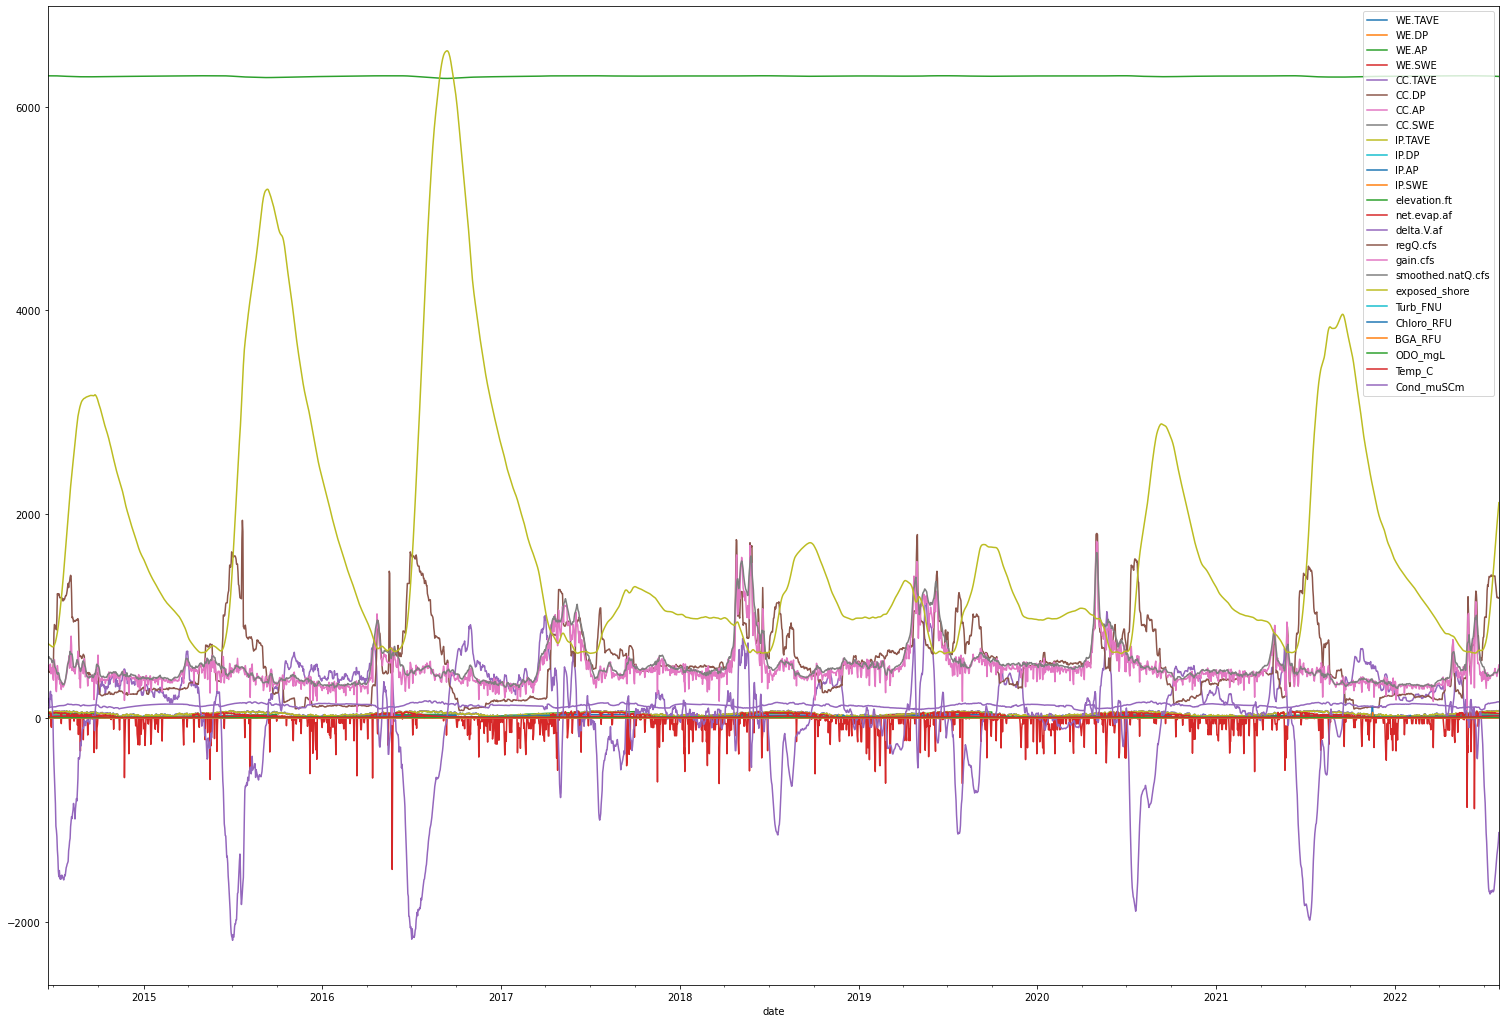

In [20]:
final_df.plot(figsize=(26,18))

In [21]:
fsm = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)

In [22]:
# create train-test split for FSM
cutoff = round(final_df.shape[0]*0.8)
X_train = final_df.drop(['Turb_FNU'], axis=1)[:cutoff]
X_test = final_df.drop(['Turb_FNU'], axis=1)[cutoff:]
y_train = final_df['Turb_FNU'][:cutoff]
y_test = final_df['Turb_FNU'][cutoff:]

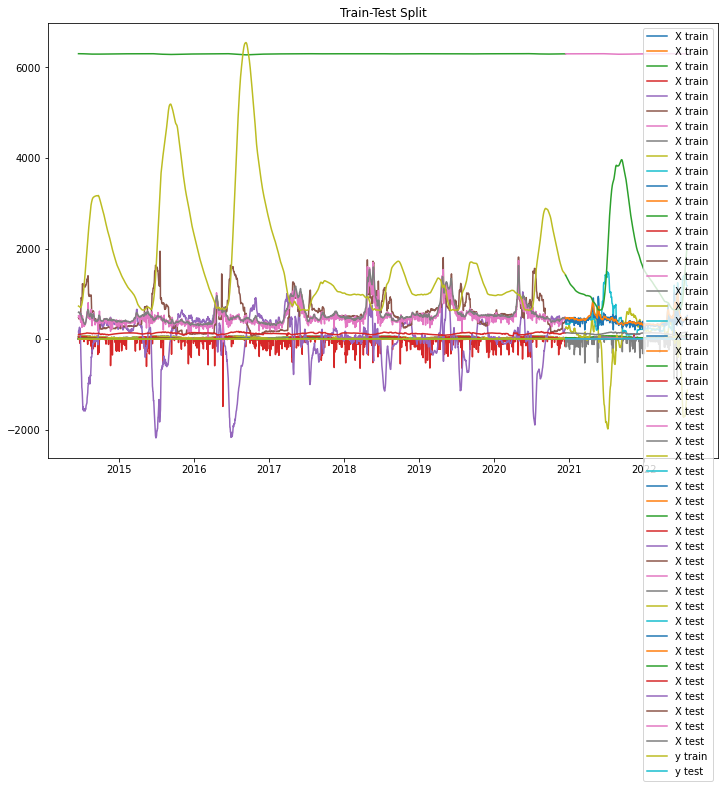

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(X_train, label='X train')
ax.plot(X_test, label='X test')
ax.plot(y_train, label='y train')
ax.plot(y_test, label='y test')
ax.set_title('Train-Test Split');
plt.legend();

In [24]:
fsm.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, random_state=42)

In [25]:
fsm_pred = fsm.predict(X_test)

In [26]:
fsm_pred = pd.DataFrame(fsm_pred)
fsm_pred.set_index(X_test.index, inplace=True)

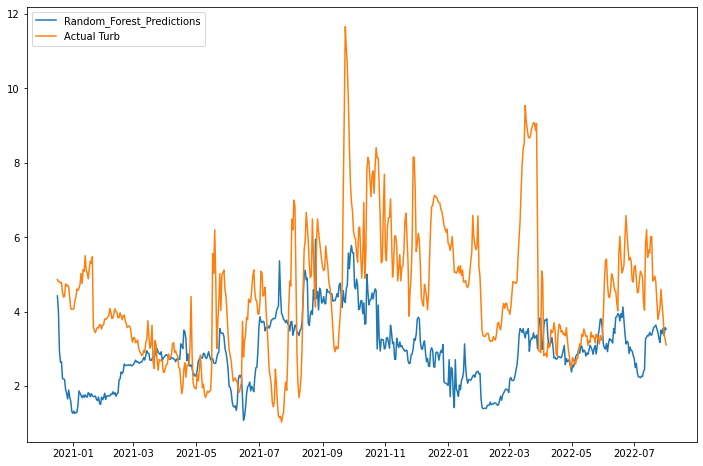

In [27]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(fsm_pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Turb')
plt.legend(loc="upper left")
plt.show()

In [28]:
fsm.score(X_test, y_test)

-0.7492669086210537

This model is arbitrarily worse than jsut guessing the mean value for turbidity by about 75%. Different hyperparameters or a grid search is needed to improve it, and likely I should find a different model to use altogether. Also, Making the data stationary before testing should drastically improve results. This model is just proof of concept to myself that I can do this.